In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

# Table of contents

* [Dummy Regression](#Dummy Regression)
* [Linear Regression](#Linear Regression)
* [Decision Tree Regression](#Decision Tree Regression)

In [2]:
def resultize(grid):
    """make a fancy df from grid.cv_results"""
    
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if 'split' not in i]
    res = res[cols]
    res = res.sort_values('rank_test_score')

    return res

In [3]:
data= pd.read_csv('cleaned_data.csv', sep=',')

In [4]:
data

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,TotalGHGEmissions,Campus,NonResidential,Nonresidential COS,SPS-District K-12,1,2,3,4,5,6,7,Building_age
0,1,1.0,12,88434,249.98,0,1,0,0,0,0,0,0,0,0,1,89
1,2,1.0,11,103566,295.86,0,1,0,0,0,0,0,0,0,0,1,20
2,5,1.0,10,61320,286.43,0,1,0,0,0,0,0,0,0,0,1,90
3,8,1.0,18,175580,505.01,0,1,0,0,0,0,0,0,0,0,1,36
4,9,1.0,2,97288,301.81,0,0,1,0,0,0,0,0,0,0,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,50069,1.0,2,24990,134.80,0,1,0,0,0,1,0,0,0,0,0,87
1479,50070,1.0,1,72000,67.65,0,1,0,0,0,0,0,1,0,0,0,3
1480,50081,1.0,3,45000,9.24,0,1,0,0,0,0,1,0,0,0,0,1
1481,50196,1.0,1,20616,4.44,0,0,1,0,0,0,0,0,1,0,0,11


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OSEBuildingID       1483 non-null   int64  
 1   NumberofBuildings   1483 non-null   float64
 2   NumberofFloors      1483 non-null   int64  
 3   PropertyGFATotal    1483 non-null   int64  
 4   TotalGHGEmissions   1483 non-null   float64
 5   Campus              1483 non-null   int64  
 6   NonResidential      1483 non-null   int64  
 7   Nonresidential COS  1483 non-null   int64  
 8   SPS-District K-12   1483 non-null   int64  
 9   1                   1483 non-null   int64  
 10  2                   1483 non-null   int64  
 11  3                   1483 non-null   int64  
 12  4                   1483 non-null   int64  
 13  5                   1483 non-null   int64  
 14  6                   1483 non-null   int64  
 15  7                   1483 non-null   int64  
 16  Buildi

In [6]:
corrMatrix = data.corr(method='spearman')

In [7]:
corrMatrix.style.applymap(lambda x: 'background-color : lightgreen' if (x >= 0.7) & (x < 0.9)
                          else 'background-color : green' if (x >= 0.9) & (x != 1)
                          else '')

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,TotalGHGEmissions,Campus,NonResidential,Nonresidential COS,SPS-District K-12,1,2,3,4,5,6,7,Building_age
OSEBuildingID,1.000000,-0.014072,-0.294925,-0.541099,-0.288549,0.015719,0.060606,0.029203,-0.112573,0.029554,0.084385,0.131386,0.086797,0.003299,-0.005128,-0.241582,0.029708
NumberofBuildings,-0.014072,1.000000,-0.033669,0.030520,0.050048,0.277259,-0.066844,-0.037474,0.003771,-0.006663,0.027706,-0.021505,0.041632,-0.006268,0.014740,-0.039095,-0.042374
NumberofFloors,-0.294925,-0.033669,1.000000,0.452481,0.190102,-0.030668,0.164953,-0.114259,-0.108930,-0.189669,-0.311761,0.056393,-0.002372,-0.094887,-0.067250,0.452917,-0.051571
PropertyGFATotal,-0.541099,0.030520,0.452481,1.000000,0.496752,0.045435,-0.062240,-0.055126,0.111076,-0.052653,-0.074101,-0.034317,-0.047976,-0.034118,-0.079170,0.218206,-0.271420
TotalGHGEmissions,-0.288549,0.050048,0.190102,0.496752,1.000000,0.113641,-0.123171,0.082906,0.044935,-0.003669,-0.143280,0.050332,-0.004363,0.013576,-0.041337,0.118514,-0.120834
Campus,0.015719,0.277259,-0.030668,0.045435,0.113641,1.000000,-0.282774,-0.022894,-0.027168,0.045163,-0.013761,0.023887,-0.013963,-0.030847,-0.029269,0.014473,-0.009065
NonResidential,0.060606,-0.066844,0.164953,-0.062240,-0.123171,-0.282774,1.000000,-0.593569,-0.704382,-0.085487,-0.007488,-0.010391,0.022947,-0.036024,-0.040220,0.091146,0.090148
Nonresidential COS,0.029203,-0.037474,-0.114259,-0.055126,0.082906,-0.022894,-0.593569,1.000000,-0.057028,-0.012841,0.010516,0.002074,-0.042558,0.030183,-0.011812,0.012968,-0.039730
SPS-District K-12,-0.112573,0.003771,-0.108930,0.111076,0.044935,-0.027168,-0.704382,-0.057028,1.000000,0.105899,0.006795,0.001951,0.011847,0.035218,0.076197,-0.138842,-0.082293
1,0.029554,-0.006663,-0.189669,-0.052653,-0.003669,0.045163,-0.085487,-0.012841,0.105899,1.000000,-0.160847,-0.101848,-0.096002,-0.083604,-0.079327,-0.190102,-0.085976


In [8]:
features = data.columns.to_list()
features.remove('TotalGHGEmissions')

In [9]:
features

['OSEBuildingID',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'Campus',
 'NonResidential',
 'Nonresidential COS',
 'SPS-District K-12',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 'Building_age']

In [10]:
X = data[features]
y = data['TotalGHGEmissions']

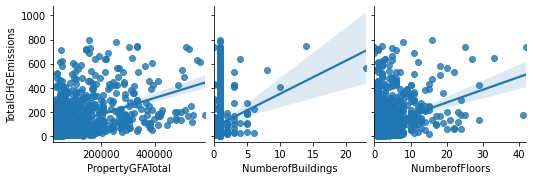

In [11]:
sns.pairplot(data,
             x_vars=['PropertyGFATotal',
                     'NumberofBuildings',
                     'NumberofFloors'],
             y_vars='TotalGHGEmissions',
             kind='reg')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape: (1038, 16)
X_test shape:  (445, 16)
y_train shape: (1038,)
y_test shape : (445,)


In [13]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [42]:
X_train

array([[-1.14052437, -0.08383201,  0.09044959, ..., -0.27706224,
         1.47126957,  0.94624638],
       [ 0.28767001, -0.08383201, -0.39225824, ...,  3.6092973 ,
        -0.6796851 ,  1.30648983],
       [ 0.6104326 , -0.08383201, -0.39225824, ..., -0.27706224,
        -0.6796851 ,  1.45659126],
       ...,
       [ 0.44513721, -0.08383201, -0.63361216, ..., -0.27706224,
        -0.6796851 ,  1.45659126],
       [ 2.56371837, -0.08383201,  0.09044959, ..., -0.27706224,
        -0.6796851 , -0.25456509],
       [ 0.65649853, -0.08383201, -0.15090433, ..., -0.27706224,
        -0.6796851 , -1.18519399]])

# Dummy Regression

In [15]:
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)

DummyRegressor()

In [16]:
y_pred = dummy_regressor.predict(X_test)
y_pred[:10]

array([103.75296724, 103.75296724, 103.75296724, 103.75296724,
       103.75296724, 103.75296724, 103.75296724, 103.75296724,
       103.75296724, 103.75296724])

In [17]:
print('R2 train score:', dummy_regressor.score(X_train, y_train).round(4))
print('R2 test score :' , dummy_regressor.score(X_test, y_test).round(4))
print()
print('MAE  test (Mean Absolute Error):    ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error):     ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 0.0
R2 test score : -0.0004

MAE  test (Mean Absolute Error):     90.86463103201923
MSE  test (Mean Squared Error):      16602.484075950088
RMSE test (Root Mean Squared Error): 128.85062699090793


# Linear Regression

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

103.75296724470135
[-14.17503491  14.20201907  14.22060413  51.21381247  11.01347888
  -3.77194803   6.74745277  -6.03065471   1.14699741  -7.64246687
   6.1405321    1.90723696   4.57146726  -1.33141579  -0.84510656
  -1.87389638]


In [20]:
y_pred_train = lin_reg.predict(X_train)
print(y_pred_train[:10])

y_pred = lin_reg.predict(X_test)
print(y_pred[:10])

[110.22887622  52.37749931  42.55083508  24.7136732  224.54839219
 133.17212003 175.27223511 121.31247228 110.45026574  78.87731301]
[ 94.43871945 173.25572771  31.46844584 156.49111246  34.68074619
  62.04811135 155.90580817 302.40771379 131.33295587 114.45815858]


In [21]:
print('R2 train score:', lin_reg.score(X_train, y_train).round(4))
print('R2 test score :' , lin_reg.score(X_test, y_test).round(4))
print()
print('MAE  train (Mean Absolute Error)    :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE  train (Mean Squared Error)     :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE train (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print('MAE  test (Mean Absolute Error)    :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error)     :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 0.3054
R2 test score : 0.1599

MAE  train (Mean Absolute Error)    : 74.08893967408878
MSE  train (Mean Squared Error)     : 12592.399508849068
RMSE train (Root Mean Squared Error): 112.2158612177845

MAE  test (Mean Absolute Error)    : 76.2827901187841
MSE  test (Mean Squared Error)     : 13941.552510189453
RMSE test (Root Mean Squared Error): 118.07435161875526


## GridSearchCV

In [22]:
estimator = LinearRegression()

params = {
         }

In [23]:
grid = GridSearchCV(estimator,
                    params,
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1, param_grid={},
             return_train_score=True, verbose=3)

In [24]:
best_params = grid.best_params_
best_params

{}

In [25]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,0.011788,0.001164,0.000999,3.693565e-07,{},0.262034,0.073153,1,0.301928,0.024405


# Decision Tree Regression

In [26]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
y_pred_train = tree_reg.predict(X_train)
print(y_pred_train[:10])

y_pred = tree_reg.predict(X_test)
print(y_pred[:10])

[109.85  63.48 102.35  69.77 147.82   3.   101.5    6.32 237.36  89.29]
[ 21.29  70.09  28.37 293.56  38.71   5.67 107.83 214.19 134.38 584.31]


In [28]:
print('R2 train score:', tree_reg.score(X_train, y_train).round(4))
print('R2 test score :' , tree_reg.score(X_test, y_test).round(4))
print()
print('MAE  train (Mean Absolute Error)    :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE  train (Mean Squared Error)     :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE train (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print('MAE  test (Mean Absolute Error)    :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error)     :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 1.0
R2 test score : -0.771

MAE  train (Mean Absolute Error)    : 0.0
MSE  train (Mean Squared Error)     : 0.0
RMSE train (Root Mean Squared Error): 0.0

MAE  test (Mean Absolute Error)    : 106.42267415730336
MSE  test (Mean Squared Error)     : 29390.850575955054
RMSE test (Root Mean Squared Error): 171.43759965642033


## GridSearchCV

In [29]:
estimator = DecisionTreeRegressor()

params = {'max_depth': [1, 2, 3, 5, 10]
         }

In [30]:
grid = GridSearchCV(estimator,
                    params,
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10]},
             return_train_score=True, verbose=3)

In [31]:
best_params = grid.best_params_
best_params

{'max_depth': 2}

In [32]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
1,0.002773,0.000390,0.000999,3.873843e-07,2,{'max_depth': 2},0.249969,0.060560,1,0.303777,0.011519
2,0.002397,0.000490,0.000999,1.101896e-06,3,{'max_depth': 3},0.238675,0.041706,2,0.373722,0.010861
0,0.003773,0.004167,0.001015,3.276236e-05,1,{'max_depth': 1},0.206989,0.030006,3,0.237261,0.009990
3,0.003396,0.000489,0.000999,6.316558e-04,5,{'max_depth': 5},0.177229,0.104015,4,0.537048,0.024202
4,0.005593,0.000800,0.000800,3.998519e-04,10,{'max_depth': 10},-0.100142,0.169688,5,0.861729,0.024628


# Random Forest Regressor

In [33]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
y_pred_train = random_forest.predict(X_train)
print(y_pred_train[:10])

y_pred = random_forest.predict(X_test)
print(y_pred[:10])

[ 95.0482  46.3759  81.7971  72.6964 189.5577  63.3028 112.2922  22.4005
 173.287   82.1306]
[ 90.9413 113.4341  31.1782 221.5317  56.4576  55.9635 198.7346 220.9801
 152.176  142.1915]


In [35]:
print('R2 train score:', random_forest.score(X_train, y_train).round(4))
print('R2 test score :' , random_forest.score(X_test, y_test).round(4))
print()
print('MAE  train (Mean Absolute Error)    :', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE  train (Mean Squared Error)     :', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE train (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print()
print('MAE  test (Mean Absolute Error)    :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE  test (Mean Squared Error)     :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE test (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 train score: 0.907
R2 test score : 0.1726

MAE  train (Mean Absolute Error)    : 26.331062042389206
MSE  train (Mean Squared Error)     : 1686.0694440893258
RMSE train (Root Mean Squared Error): 41.06177594904202

MAE  test (Mean Absolute Error)    : 75.11678696629212
MSE  test (Mean Squared Error)     : 13730.951223962607
RMSE test (Root Mean Squared Error): 117.17914159082497


## GridSearchCV

In [49]:
estimator = RandomForestRegressor()

params = {'n_estimators': [50, 100, 150, 200],
          'max_depth': [2, 3, 4, 5, 10, 15]
         }

In [50]:
grid = GridSearchCV(estimator,
                    params,
                    cv=5,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, verbose=3)

In [51]:
best_params = grid.best_params_
best_params

{'max_depth': 5, 'n_estimators': 100}

In [52]:
resultize(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
13,0.340873,0.006650,0.016183,3.994942e-04,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.341707,0.069500,1,0.581888,0.019533
15,0.689139,0.018545,0.030369,7.991076e-04,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.340149,0.072260,2,0.583833,0.015725
14,0.504553,0.007712,0.023776,3.996135e-04,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.339753,0.077555,3,0.582347,0.017334
12,0.178251,0.008440,0.008356,4.492942e-04,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.339026,0.080018,4,0.575465,0.015918
22,0.856118,0.014268,0.027572,1.198506e-03,15,150,"{'max_depth': 15, 'n_estimators': 150}",0.336900,0.068859,5,0.899469,0.004503
10,0.463522,0.005172,0.024375,2.329910e-03,4,150,"{'max_depth': 4, 'n_estimators': 150}",0.336220,0.068377,6,0.509852,0.018331
8,0.157048,0.002793,0.008981,1.993464e-05,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.335165,0.065854,7,0.507237,0.018862
9,0.312678,0.005248,0.015987,6.318452e-04,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.334176,0.071382,8,0.509551,0.019075
11,0.619005,0.003876,0.030550,8.135280e-04,4,200,"{'max_depth': 4, 'n_estimators': 200}",0.334041,0.065973,9,0.510946,0.018060
18,0.700278,0.016620,0.024793,4.107454e-04,10,150,"{'max_depth': 10, 'n_estimators': 150}",0.333394,0.068899,10,0.835445,0.004286
